In [1]:
import igraph as ig

#communities, graphdata = load_dataset("data/data3.t00100.comms", "data/data3.t00100.graph")

# Nodes is the dict assinging nodes to communities
nodes = dict()

with open("../data/data3.t00100.comms", 'rt') as fp:
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if line[0] == "#" or line == '':
            continue
        node_id,cmty_id = line.split(' ')
        nodes[node_id]=cmty_id


G = ig.Graph.Read_Edgelist("../data/data3.t00100.graph", directed=False)
 

print(f"Grafo carregado com {len(G.vs)} vértices")


Grafo carregado com 512 vértices


In [3]:
import sys
sys.path.append('/home/aurelio/devel/python/dynbench')
import bm

num_communities = 4
nodes_per_community = 32

bm_model = bm.get_model('StdMerge', p_in=.5, p_out=.1, n=nodes_per_community, q=num_communities)

G = bm_model.graph(0)
G_1 = bm_model.graph(1)
for i in range(G.number_of_nodes()):
    print(i,'-',G.degree[i],G_1.degree[i])

#nx_comms = [k for k,v in bm_model.comms(0).items() for z in v]
#print(nx_comms)


0 - 28
1 - 19
2 - 21
3 - 21
4 - 24
5 - 23
6 - 34
7 - 16
8 - 29
9 - 27
10 - 29
11 - 30
12 - 23
13 - 29
14 - 31
15 - 30
16 - 27
17 - 31
18 - 27
19 - 30
20 - 26
21 - 23
22 - 25
23 - 22
24 - 28
25 - 27
26 - 37
27 - 28
28 - 25
29 - 26
30 - 23
31 - 25
32 - 29
33 - 27
34 - 25
35 - 24
36 - 27
37 - 23
38 - 23
39 - 25
40 - 29
41 - 28
42 - 24
43 - 37
44 - 31
45 - 25
46 - 27
47 - 24
48 - 20
49 - 26
50 - 29
51 - 22
52 - 29
53 - 28
54 - 27
55 - 29
56 - 30
57 - 26
58 - 21
59 - 25
60 - 28
61 - 26
62 - 26
63 - 26
64 - 44
65 - 35
66 - 39
67 - 40
68 - 32
69 - 36
70 - 43
71 - 35
72 - 31
73 - 41
74 - 43
75 - 38
76 - 41
77 - 38
78 - 39
79 - 39
80 - 40
81 - 32
82 - 31
83 - 41
84 - 40
85 - 43
86 - 40
87 - 38
88 - 36
89 - 43
90 - 39
91 - 37
92 - 34
93 - 30
94 - 30
95 - 41
96 - 45
97 - 39
98 - 34
99 - 38
100 - 41
101 - 48
102 - 35
103 - 39
104 - 40
105 - 36
106 - 37
107 - 34
108 - 42
109 - 37
110 - 36
111 - 37
112 - 38
113 - 43
114 - 43
115 - 39
116 - 37
117 - 45
118 - 37
119 - 35
120 - 41
121 - 31
122 - 41
123

In [120]:
import numpy as np
G2 = nx.karate_club_graph()
labels = np.asarray([G2.nodes[i]['club'] != 'Mr. Hi' for i in G2.nodes]).astype(np.int64)
target_classes = torch.randint(0, 2, (2, 11))
print(target_classes)

tensor([[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])


In [189]:
import cdgat
import networkx as nx
import torch
from torch.optim import Adam
import importlib

importlib.reload(cdgat)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'



#TODO: Esses caras precisam ser tensores
#nodes = bm_model.graph(0).nodes # esse aqui especificamente, precisammos transformar a matriz de adj. em matrix de proximidade
#approx_matrix = nx.floyd_warshall_numpy(bm_model.graph(0))
#nodes_tensor = torch.tensor(approx_matrix, dtype=torch.float).to(device)
#y_tensor = torch.tensor(nx_comms, dtype=torch.long).to(device)

#y_tensor = torch.reshape(y_tensor, (600,-1))

#edge_index = torch.tensor([x for x in bm_model.graph(0).edges], dtype=torch.int)
#edge_index = edge_index.transpose(0,1).to(device)

import dataset

importlib.reload(dataset)

DS = dataset.DynLRFDataset(device=device)

data = DS[0]
data = data.to(device)

model = cdgat.get_model(DS.num_features, DS.num_classes, device)
optimizer = Adam(model.parameters(), lr=0.005, weight_decay=5e-4)


print("Training model")
for epoch in range(1, 2001):
    cdgat.train_model(model, data, optimizer)

print("Validating model") 
train_acc, test_acc = cdgat.test(model, data)
#print(f'Epoch: {epoch:03d}, Train: {train_acc:.4f}, Val: {val_acc:.4f}, '
print(f'Epoch: {epoch:03d}, Train: {train_acc:.4f}, '
      f'Test: {test_acc:.4f}'
    )

#cdgat.save_checkpoint(model, )

Training model
Validating model
Epoch: 2000, Train: 0.4571, Test: 0.4556


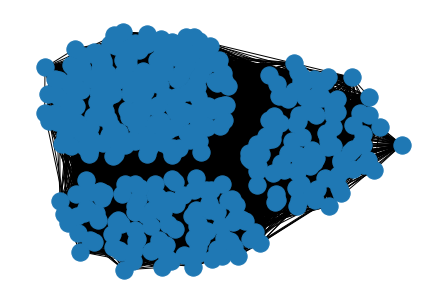

In [32]:
from matplotlib import pyplot as plt
import networkx as nx
%matplotlib inline
#ig.plot(G)
nx.draw(nx_graph)
#plt.show()

In [3]:
community = G.community_walktrap().as_clustering()

membership = community.membership
print(community.summary())
modularity = G.modularity(membership)
print("With modularity:", modularity)

Clustering with 512 elements and 2 clusters
With modularity: 0.33007565999789584


In [4]:
comm_assign = [int(assign) for assign in nodes.values()]
print(comm_assign)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [5]:
loss = ig.Clustering.compare_to(community, comm_assign, method='nmi')

print(f"NMI {loss}")

NMI 1.0


In [15]:
# Experimentação usando similaridade e k-means
%matplotlib inline
adj = G.get_adjacency()
print(adj.shape)

simi_list = G.similarity_dice(loops=False)
print(type(simi_list), len(simi_list), type(simi_list[0]), len(simi_list[0]))
print(simi_list[0][1])

from sklearn.cluster import KMeans
from numpy import unique,where

model = KMeans(n_clusters=2)
model.fit(simi_list)
yhat = model.predict(simi_list)
clusters = unique(yhat)

loss2 = ig.Clustering.compare_to(yhat, comm_assign, method='nmi')
print('NMI com k-means',loss2)
#for cluster in clusters:
#	# get row indexes for samples with this cluster
#	row_ix = where(yhat == cluster)
#	# create scatter of these samples
#	plt.scatter(simi_list[row_ix[0]], simi_list[row_ix[1]])


(512, 512)
<class 'list'> 512 <class 'list'> 512
0.45394736842105254
NMI com k-means 1.0
